In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
config = {
            "font.family": 'serif',
            "font.size": 14,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
plt.rcParams.update(config)

In [216]:
# df=pd.read_csv(r'C:\Users\飘哥\Desktop\64out.csv',encoding='gb2312',usecols=['name','hour','yhat'])
# df.hour=pd.to_datetime(df.hour)
# df['riqi']=df.hour.dt.hour
# df.to_csv(r'C:\Users\飘哥\Desktop\out.csv',index=None,encoding='gb2312')

In [62]:
df1=pd.read_csv(r'C:\Users\飘哥\Desktop\聚类\in.csv',encoding='gb2312',usecols=['name','hour','yhat'])
df=df1.groupby(['hour','name']).mean().unstack().sort_values('hour')
df.columns = df.columns.droplevel(0)
df

name,七宝,七莘路,三林,三林东,三门路,上南路,上大路,上海体育场,上海体育馆,上海儿童医学中心,...,黄兴公园,黄兴路,黄陂南路,龙华,龙华中路,龙柏新村,龙溪路,龙漕路,龙耀路,龙阳路
hour,,,,,,,,,,,,,,,,,,,,,
6,684,507,532,475,132,329,301,189,240,121,...,227,472,75,167,136,264,156,558,246,664
7,1925,1799,1631,1656,438,828,796,603,715,488,...,736,1399,167,572,527,965,464,2069,696,1887
8,2792,1939,2319,2088,437,1191,899,860,933,677,...,713,1619,284,917,727,1201,629,3168,833,3241
9,1483,720,786,872,178,387,346,571,573,403,...,300,735,291,400,472,542,355,1694,307,1478
10,593,204,295,300,94,121,145,327,354,207,...,112,324,351,155,271,264,137,571,92,497
11,478,219,210,168,79,88,91,306,351,218,...,109,276,405,128,253,220,111,403,79,394
12,699,263,193,223,85,102,145,335,387,134,...,122,287,449,131,360,257,145,417,104,511
13,633,220,222,179,67,98,89,411,423,129,...,120,261,517,124,467,275,99,359,83,396
14,568,217,169,141,99,90,64,437,457,220,...,97,218,630,143,392,257,117,377,70,362


In [18]:
data=pd.read_csv(r'C:\Users\飘哥\Desktop\聚类\out.csv',encoding='gb2312',usecols=['name','hour','yhat'])
data=data.groupby(['hour','name']).mean().unstack()
data.columns = data.columns.droplevel(0)
data.head()

name,七宝,七莘路,三林,三林东,三门路,上南路,上大路,上海体育场,上海体育馆,上海儿童医学中心,...,黄兴公园,黄兴路,黄陂南路,龙华,龙华中路,龙柏新村,龙溪路,龙漕路,龙耀路,龙阳路
hour,,,,,,,,,,,,,,,,,,,,,
7,1218,327,243,231,138,118,92,586,825,728,...,127,700,1161,472,715,275,332,1048,247,1459
8,2457,1353,286,420,764,181,567,1633,2720,704,...,324,496,3708,687,4822,1422,776,2283,632,2093
9,1491,881,272,224,1293,96,329,1484,1804,332,...,234,359,3532,244,2282,714,355,1290,221,974
10,796,333,162,162,412,65,117,532,645,155,...,112,215,1359,156,747,341,106,448,72,428
11,694,212,161,137,108,71,83,378,401,115,...,101,217,675,104,510,277,125,339,57,382


In [5]:
#归一化
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=[0,1])
result1=scaler.fit_transform(df)
result1=pd.DataFrame(result1)
result1=result1.T

result2=scaler.fit_transform(data)
result2=pd.DataFrame(result2)
result2=result2.T
result2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.342962,0.911050,0.468134,0.149473,0.102705,0.113251,0.061440,0.111875,0.109583,0.200825,0.519028,1.000000,0.587804,0.198533,0.104539,0.000000
1,0.125192,0.913210,0.550691,0.129800,0.036866,0.046851,0.049923,0.072197,0.069892,0.166667,0.453149,1.000000,0.589862,0.209677,0.109063,0.000000
2,0.062452,0.095202,0.084539,0.000762,0.000000,0.023610,0.008378,0.068545,0.050267,0.157654,0.583397,1.000000,0.771516,0.313024,0.207921,0.113481
3,0.070783,0.213102,0.065512,0.018825,0.000000,0.025602,0.009789,0.068524,0.122741,0.228916,0.535392,1.000000,0.660392,0.330572,0.205572,0.103916
4,0.070796,0.574417,1.000000,0.291231,0.046661,0.044248,0.062751,0.036203,0.034594,0.055511,0.175382,0.246983,0.139984,0.045052,0.028158,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.066721,1.000000,0.423922,0.120423,0.068348,0.065094,0.079740,0.079740,0.087876,0.183889,0.504475,0.741253,0.406835,0.092758,0.022783,0.000000
319,0.351825,1.000000,0.385401,0.021898,0.049635,0.039416,0.018978,0.024818,0.108029,0.167883,0.378102,0.602920,0.337226,0.122628,0.097810,0.000000
320,0.358624,0.983308,0.481032,0.055134,0.000000,0.006576,0.038442,0.027820,0.104704,0.196763,0.714719,1.000000,0.552352,0.281234,0.156297,0.049064
321,0.330435,1.000000,0.285217,0.026087,0.000000,0.017391,0.017391,0.038261,0.109565,0.132174,0.667826,0.885217,0.422609,0.193043,0.154783,0.060870


In [6]:
#拼接
data2=pd.concat([result1,result2],1)
data2

,0,1,2,3,4,5,6,7,8,9,...,6,7,8,9,10,11,12,13,14,15
0,0.089023,0.625324,1.000000,0.434313,0.049697,0.000000,0.095506,0.066984,0.038894,0.047537,...,0.061440,0.111875,0.109583,0.200825,0.519028,1.000000,0.587804,0.198533,0.104539,0.000000
1,0.188669,0.920680,1.000000,0.309348,0.016997,0.025496,0.050425,0.026062,0.024363,0.048725,...,0.049923,0.072197,0.069892,0.166667,0.453149,1.000000,0.589862,0.209677,0.109063,0.000000
2,0.192499,0.689110,1.000000,0.307275,0.085404,0.046995,0.039313,0.052418,0.028468,0.022594,...,0.008378,0.068545,0.050267,0.157654,0.583397,1.000000,0.771516,0.313024,0.207921,0.113481
3,0.195912,0.784646,1.000000,0.393819,0.108674,0.042871,0.070289,0.048355,0.029412,0.030409,...,0.009789,0.068524,0.122741,0.228916,0.535392,1.000000,0.660392,0.330572,0.205572,0.103916
4,0.101881,0.581505,0.579937,0.173981,0.042320,0.018809,0.028213,0.000000,0.050157,0.062696,...,0.062751,0.036203,0.034594,0.055511,0.175382,0.246983,0.139984,0.045052,0.028158,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.044852,0.759429,1.000000,0.328236,0.044852,0.000000,0.037717,0.056065,0.037717,0.021407,...,0.079740,0.079740,0.087876,0.183889,0.504475,0.741253,0.406835,0.092758,0.022783,0.000000
319,0.144665,0.701627,1.000000,0.504521,0.110307,0.063291,0.124774,0.041591,0.074141,0.084991,...,0.018978,0.024818,0.108029,0.167883,0.378102,0.602920,0.337226,0.122628,0.097810,0.000000
320,0.117050,0.628214,1.000000,0.501353,0.121448,0.064614,0.069350,0.049729,0.055819,0.071380,...,0.038442,0.027820,0.104704,0.196763,0.714719,1.000000,0.552352,0.281234,0.156297,0.049064
321,0.248399,0.824584,1.000000,0.326504,0.051216,0.034571,0.066581,0.039693,0.023047,0.025608,...,0.017391,0.038261,0.109565,0.132174,0.667826,0.885217,0.422609,0.193043,0.154783,0.060870


In [194]:
# #标准化
# from sklearn.preprocessing import StandardScaler
# standard=StandardScaler()
# result2=standard.fit_transform(df)
# result2=pd.DataFrame(result2)
# # df.to_csv(r'C:\Users\飘哥\Desktop\聚类.csv')
# result2=result2.T
# result2

In [37]:
# #标签编码
# from sklearn.preprocessing import LabelEncoder
# data.index=LabelEncoder().fit_transform(data.index)
# data

In [23]:
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=2,random_state=0).fit(data2)
#分类结果
y_pred=cluster.labels_
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [27]:
# zz=df1.query('hour==6').drop(['yhat','hour'],1)
# zz['label']=cluster.labels_
# zz
# zz.to_csv(r'C:\Users\飘哥\Desktop\分类结果出站啊.csv',index=None,encoding='gb2312')

In [24]:
#查看质心
centroid=cluster.cluster_centers_
ss=pd.DataFrame(centroid).T
ss.head()

,0,1
0,0.278320,0.065883
1,0.873853,0.393357
2,0.911131,0.521269
3,0.317500,0.227555
4,0.100291,0.092414


In [26]:
ss.to_csv(r'C:\Users\飘哥\Desktop\分类结果出站.csv',index=None,encoding='gb2312')

In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

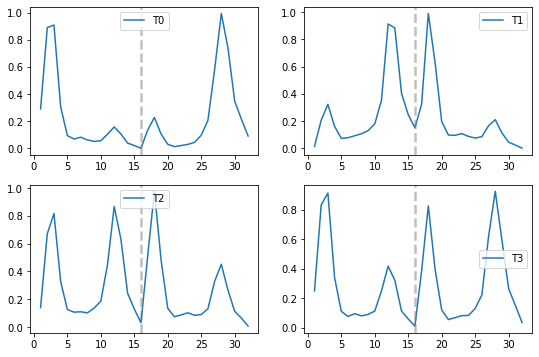

In [11]:
y1=ss.iloc[:,0]
y2=ss.iloc[:,1]
y3=ss.iloc[:,2]
y4=ss.iloc[:,3]
import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,2,figsize=(9,6))
axs[0,0].plot(np.arange(1,33),y1,label='T0')
axs[0,1].plot(np.arange(1,33),y2,label='T1')
axs[1,0].plot(np.arange(1,33),y3,label='T2')
axs[1,1].plot(np.arange(1,33),y4,label='T3')
axs[0,0].axvline(x=16, c='gray', lw=2.5,alpha=0.5, ls='--')
axs[0,1].axvline(x=16, c='gray', lw=2.5,alpha=0.5, ls='--')
axs[1,0].axvline(x=16, c='gray', lw=2.5,alpha=0.5, ls='--')
axs[1,1].axvline(x=16, c='gray', lw=2.5,alpha=0.5, ls='--')
axs[0,0].legend(loc='upper center')
axs[0,1].legend()
axs[1,0].legend(loc='upper center')
axs[1,1].legend()
# plt.savefig(r'C:\Users\飘哥\Desktop\分类图.png',bbox_inches='tight',dpi=600)

In [27]:
#总距离平方和
cluster.inertia_

169.32711646744053

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


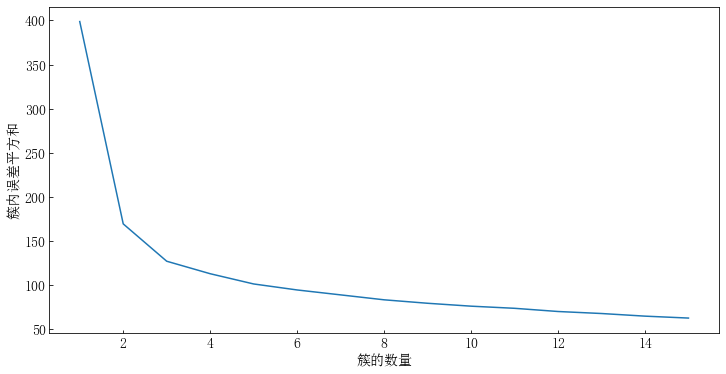

In [40]:
#寻找最佳k值
inertia=[]
for i in range(1,16):
    cluster=KMeans(n_clusters=i,random_state=0).fit(data2)
    inertia.append(cluster.inertia_)  #簇内的误差平方和
plt.figure(figsize=(12,6))
plt.plot(range(1,16),inertia)

# plt.title("寻找最佳K值")
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

In [41]:
pd.DataFrame(inertia).to_clipboard(excel=True)

In [53]:
inertia=pd.read_clipboard()
inertia

,inertia
0,398.751868
1,199.327116
2,150.982628
3,112.816624
4,101.203530
5,94.404496
6,88.824184
7,83.237193
8,79.315984
9,76.020916


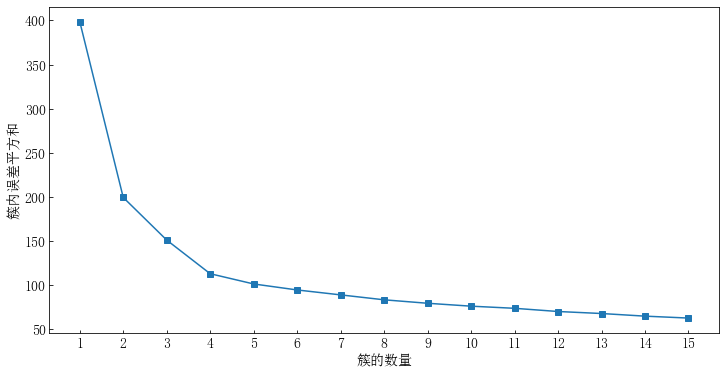

In [61]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16),inertia,'-s')

# plt.title("寻找最佳K值")
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.xticks(np.arange(1,16,1))
plt.savefig(r'C:\Users\飘哥\Desktop\簇类平方和.png',dpi=200,bbox_inches='tight')
plt.show()